# **6-1. 군집 알고리즘**

--2022-03-30 02:50:11--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-30 02:50:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-30 02:50:12--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

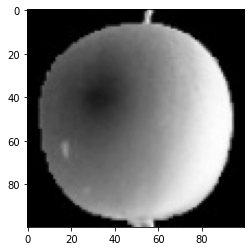

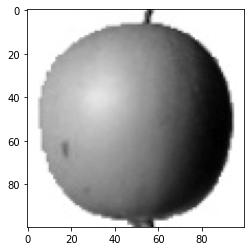

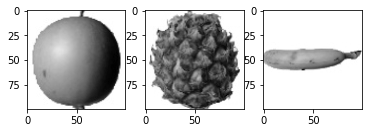

In [ ]:
# 데이터 불러오기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

# 데이터 준비
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
print(fruits.shape)

# 첫 번째 이미지의 첫 번째 행 출력
print(fruits[0,0,:])

# 첫 번째 이미지 그리기
plt.imshow(fruits[0], cmap='gray')   ### 흑백 이미지
plt.show()

# 원래의 첫 번째 이미지 그리기
plt.imshow(fruits[0], cmap='gray_r')   ### 흑백 이미지
plt.show()

# 사과 외에 파인애플, 바나나 이미지도 그리기
fig, axs = plt.subplots(1,3)
axs[0].imshow(fruits[0], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
axs[2].imshow(fruits[200], cmap='gray_r')
plt.show()

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


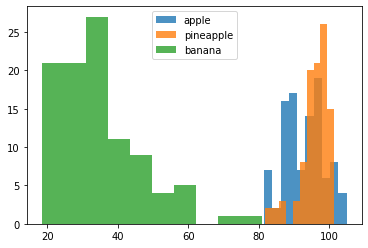

In [ ]:
# 이미지 하나의 100 X 100 픽셀을 펼쳐서 길이가 10000인 1차원 배열로 만들기
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

# 샘플마다 픽셀의 평균값 계산하기
print(apple.mean(axis=1))

# 히스토그램으로 평균값 분포 확인
plt.hist(np.mean(apple,axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

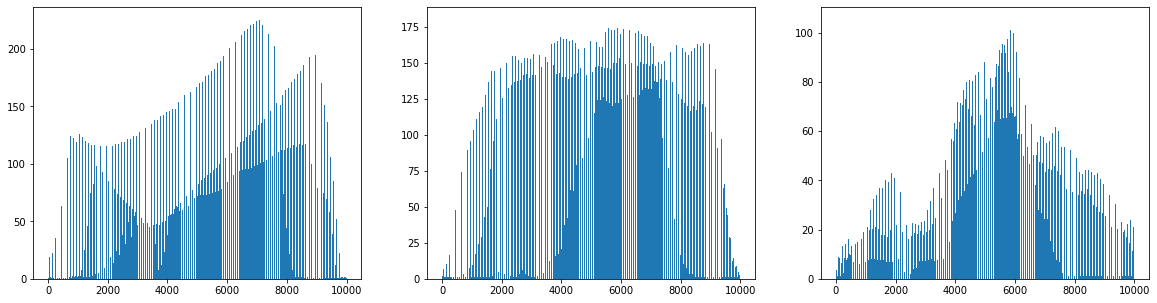

In [ ]:
# 전체 샘플에 대해 각 픽셀의 평균값 확인
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

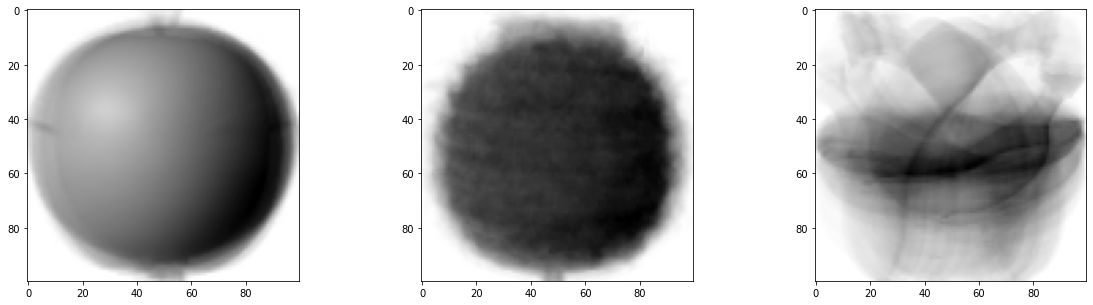

In [ ]:
# 각 픽셀의 평균값
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

# 픽셀 평균값으로 이미지 출력
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

(300,)


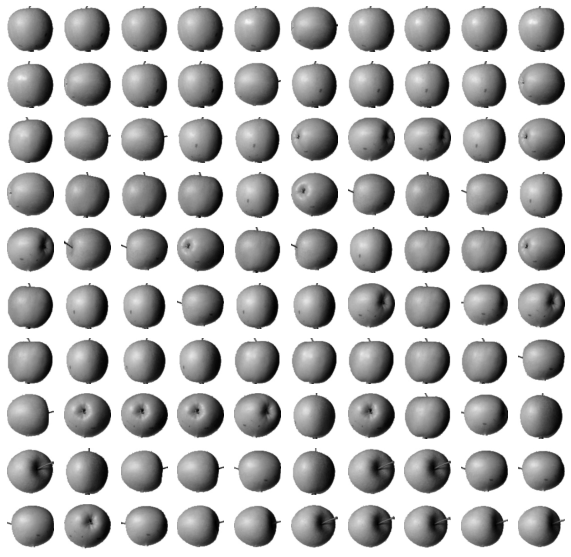

In [ ]:
# 사과 사진의 평균값과 가장 가까운 사진 고르기

# 절댓값 오차의 평균 계산
abs_diff = np.abs(fruits - apple_mean)   ### 절댓값 오차
abs_mean = np.mean(abs_diff, axis=(1,2))   ### 각 샘플의 절댓값 오차의 평균
print(abs_mean.shape)

# 절댓값 오차의 평균이 가장 작은 순서대로 100개의 그림 그리기
apple_index = np.argsort(abs_mean)[:100]   ### 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스 반환
fig,axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    axs[i,j].axis('off')   ### 좌표축 그리지 않기 => 깔끔하게 그리기 위함
plt.show()

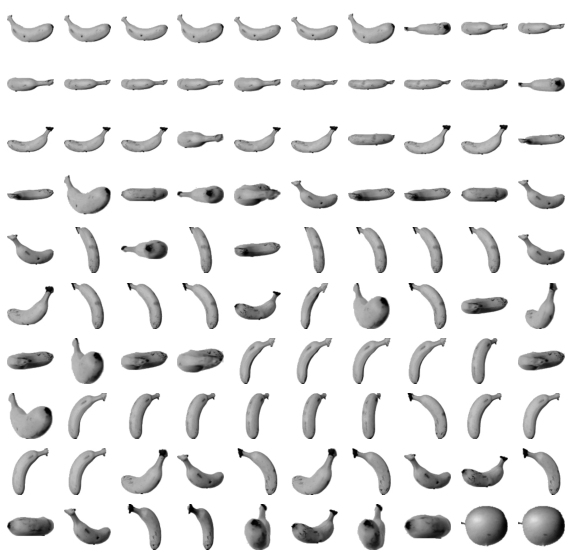

In [ ]:
# 바나나 사진의 평균값과 가장 가까운 사진 고르기

# 절댓값 오차의 평균 계산
abs_diff = np.abs(fruits - banana_mean)   ### 절댓값 오차
abs_mean = np.mean(abs_diff, axis=(1,2))   ### 각 샘플의 절댓값 오차의 평균

# 절댓값 오차의 평균이 가장 작은 순서대로 100개의 그림 그리기
banana_index = np.argsort(abs_mean)[:100]   ### 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스 반환
fig,axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
    axs[i,j].axis('off')   ### 좌표축 그리지 않기 => 깔끔하게 그리기 위함
plt.show()

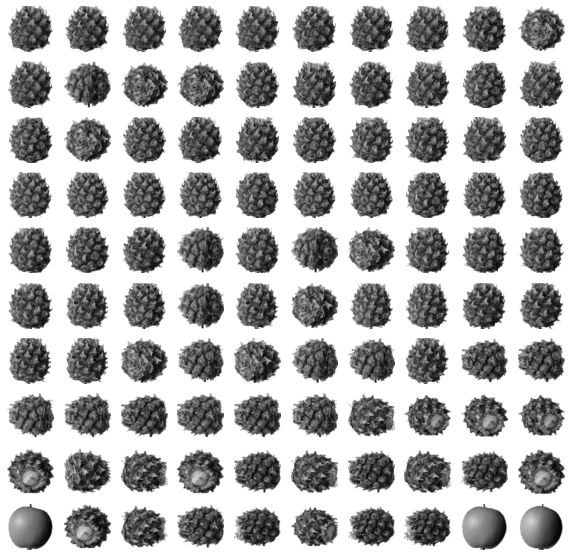

In [ ]:
# 파인애플 사진의 평균값과 가장 가까운 사진 고르기

# 절댓값 오차의 평균 계산
abs_diff = np.abs(fruits - pineapple_mean)   ### 절댓값 오차
abs_mean = np.mean(abs_diff, axis=(1,2))   ### 각 샘플의 절댓값 오차의 평균

# 절댓값 오차의 평균이 가장 작은 순서대로 100개의 그림 그리기
pineapple_index = np.argsort(abs_mean)[:100]   ### 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스 반환
fig,axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[pineapple_index[i*10 + j]], cmap='gray_r')
    axs[i,j].axis('off')   ### 좌표축 그리지 않기 => 깔끔하게 그리기 위함
plt.show()

# **6-2. k-평균**

--2022-03-31 08:13:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 08:13:18--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 08:13:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

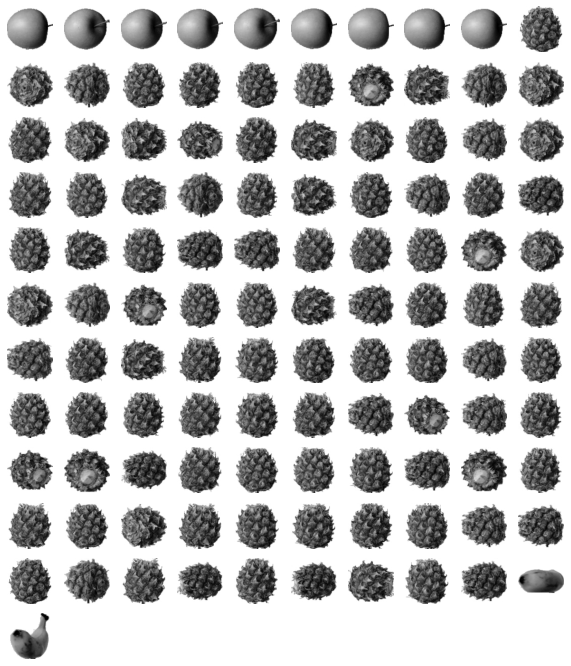

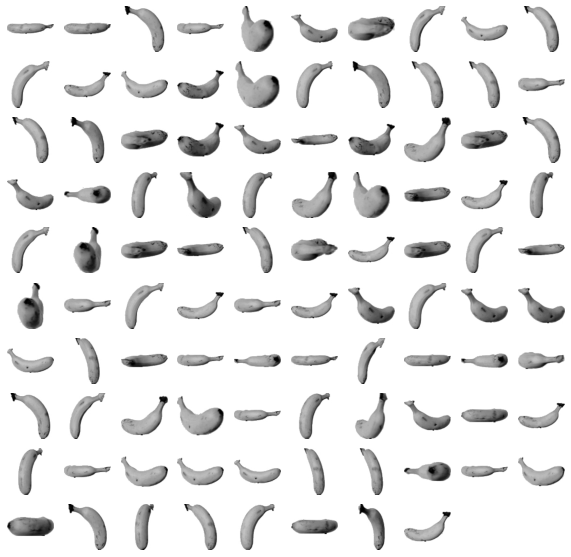

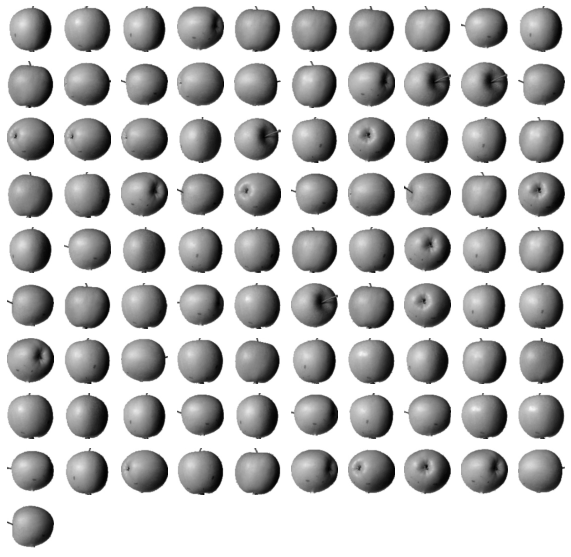

In [ ]:
# 데이터 불러오기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

# 배열 변경 : 3차원(샘플 개수, 너비, 높이) -> 2차원(샘플 개수, 너비x높이)
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

# KMeans 클래스
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

# 클러스터 결과 확인
print(km.labels_) ### 클러스터링 결과
print(np.unique(km.labels_, return_counts=True))

# 각 클러스터의 그림을 출력하는 함수
def draw_fruits(arr, ratio=1):
  n = len(arr)   ### 샘플 개수
  rows = int(np.ceil(n/10))   ### 한 줄에 10개씩 이미지 그리기
  cols = n if rows < 2 else 10   ### 행이 1개면 열의 개수는 샘플 개수 -> 그렇지 않으면 10개
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n :
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

# 클러스터별 그림 확인
import matplotlib.pyplot as plt
draw_fruits(fruits[km.labels_==0])
draw_fruits(fruits[km.labels_==1])
draw_fruits(fruits[km.labels_==2])

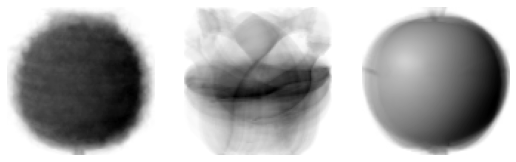

[[3393.8136117  8837.37750892 5267.70439881]]
[0]


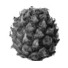

4


In [ ]:
# KMeans 클래스가 최종적으로 찾은 클러스터 중심의 이미지 출력
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)

# 인덱스 = 100인 샘플
print(km.transform(fruits_2d[100:101]))   ### 샘플에서 클러스터 중심까지 거리로 변환
print(km.predict(fruits_2d[100:101]))   ### 가장 가까운 클러스터 중심을 예측 클래스로 출력
draw_fruits(fruits[100:101])   ### 샘플 그려보기

# 알고리즘이 반복한 횟수
print(km.n_iter_)

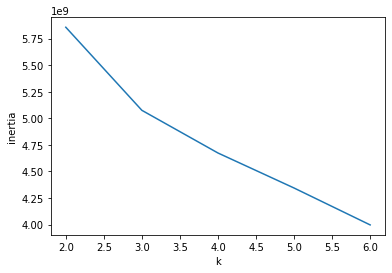

In [ ]:
# 이너셔 계산
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# **6-3. 주성분 분석**

--2022-03-31 10:12:29--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 10:12:29--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 10:12:29--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

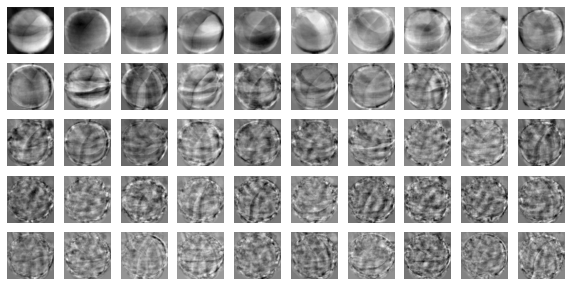

(300, 10000)
(300, 50)


In [ ]:
# 데이터 불러오기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

# PCA 실행
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

# PCA 클래스가 찾은 주성분 배열의 크기
print(pca.components_.shape)

# 주성분을 그림으로 그리기
draw_fruits(pca.components_.reshape(-1,100,100))

# 원본 데이터의 차원 50개로 줄이기
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)


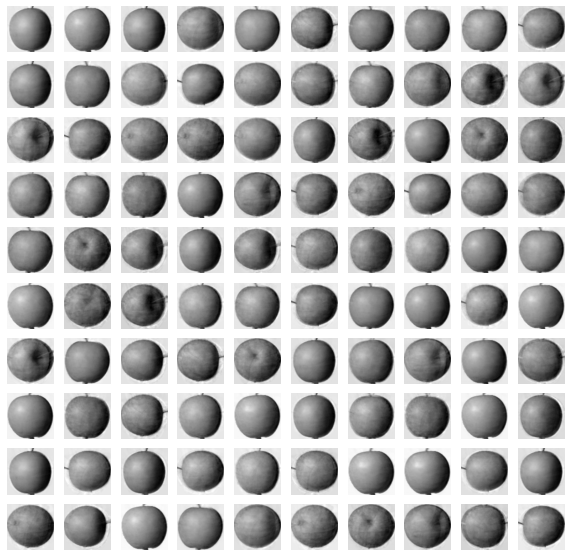

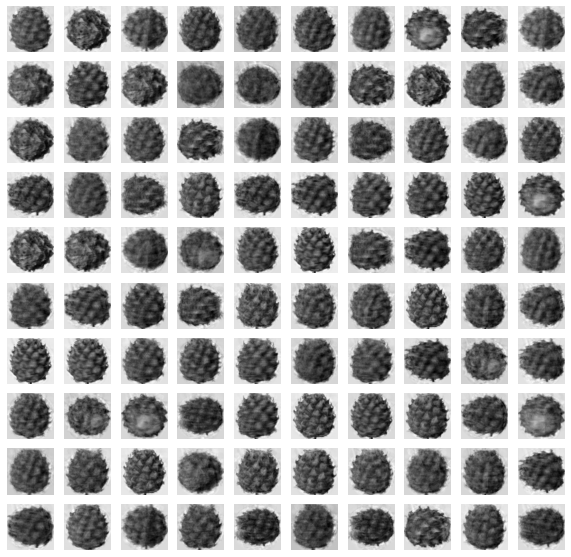

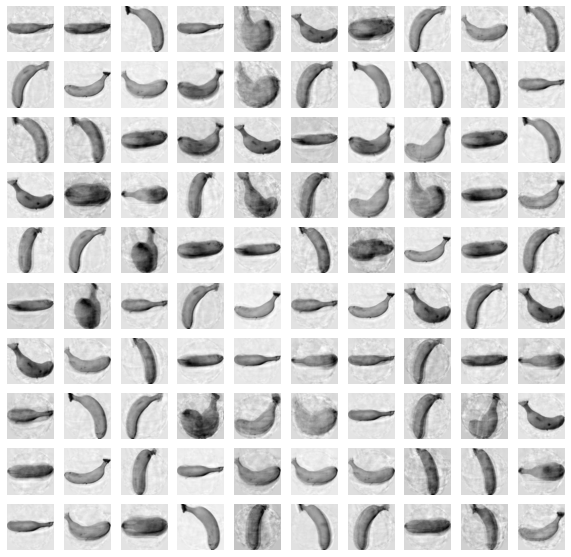

In [ ]:
# 줄인 차원의 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

# 복원한 데이터 그림 출력
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.005112
 0.00486383 0.00480346 0.00447836 0.00437319 0.00408036 0.00389467
 0.00372436 0.00359278 0.00331411 0.00317833 0.00304213 0.0030373
 0.00288799 0.00275652 0.00264946 0.00255194 0.00252165 0.00247433
 0.00239533 0.0023087  0.0022228  0.0021632  0.0021392  0.00195847
 0.00191899 0.00188216 0.00184314 0.00183272 0.00173155 0.00169867
 0.00162592 0.00158099]
0.9215195773911332


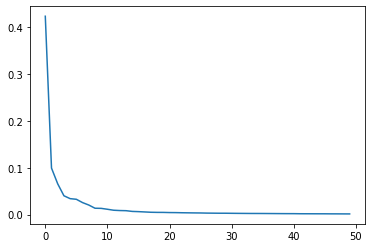

In [ ]:
# 주성분별 설명된 분산값
print(pca.explained_variance_ratio_)

# 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))

# 주성분별 설명된 분산값 그림으로 확인
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

# 원래의 데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# pca로 축소한 데이터
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.6661887645721436
1.0
0.04284157752990723


2
(300, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9933333333333334
0.056453895568847653
(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


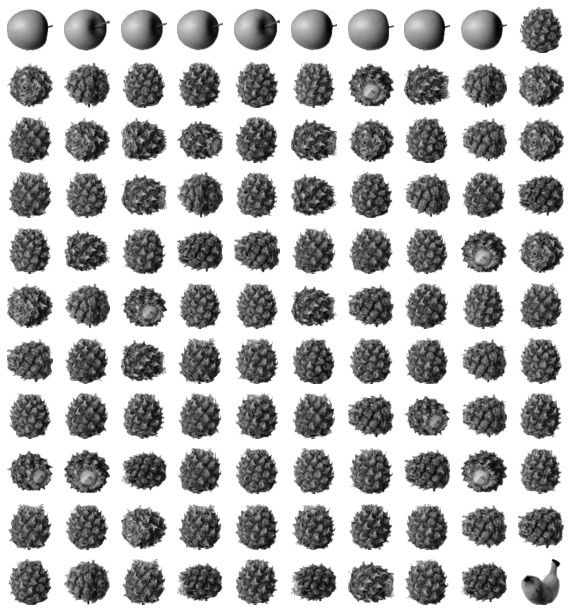

/n


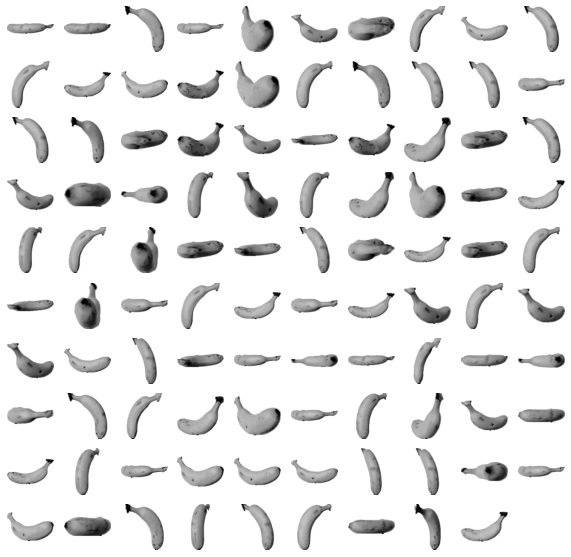

/n


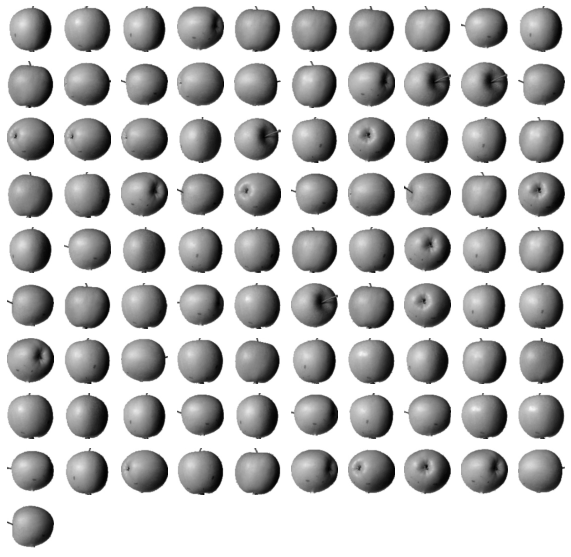

/n


In [ ]:
# 설명된 분산 비율 입력
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

# 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

# 설명된 분산 비율이 0.5인 2개의 특성만 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾아보기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

# 클러스터별 이미지 출력
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('/n')

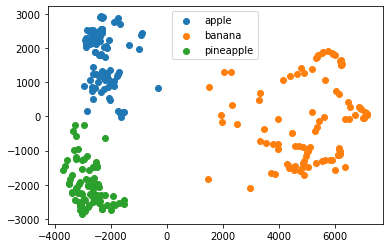

In [ ]:
# 클러스터별 산점도
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()